In [48]:
import numpy as np

# Softmax function for multi-class classification

In [49]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

## Cross-entropy loss function

In [50]:
def cross_entropy_loss(Y, Y_hat):
    m = Y.shape[0]
    return -np.sum(Y * np.log(Y_hat)) / m

## Gradient of the loss function with respect to weights

In [51]:
def compute_gradients(X, Y, Y_hat):
    m = X.shape[0]
    dW = np.dot(X.T, (Y_hat - Y)) / m # weight 
    dB = np.sum(Y_hat - Y, axis=0, keepdims=True) / m # bias
    return dW, dB

## Training the multinomial logistic regression model

In [52]:
def train_multinomial_logistic_regression(X, Y, num_classes, learning_rate=0.01, num_epochs=1000):
    num_samples, num_features = X.shape
    weights = np.random.randn(num_features, num_classes) * 0.01  # Small random initialization
    bias = np.zeros((1, num_classes))

    for epoch in range(num_epochs):
        # Forward pass
        Z = np.dot(X, weights) + bias  # Linear combination
        Y_hat = softmax(Z)  # Predicted probabilities
        
        # Compute loss
        loss = cross_entropy_loss(Y, Y_hat)

        # Backward pass (gradient calculation)
        dW, dB = compute_gradients(X, Y, Y_hat)
        
        # Gradient descent step
        weights -= learning_rate * dW
        bias -= learning_rate * dB
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Loss: {loss:.4f}')

    return weights, bias

## Prediction function

In [53]:
def predict(X, weights, bias):
    Z = np.dot(X, weights) + bias
    Y_hat = softmax(Z)
    return np.argmax(Y_hat, axis=1)  # Return the class with the highest probability


### Generating dummy data: 100 samples, 3 features, 3 classes

In [54]:
np.random.seed(42)
X_train = np.random.randn(100, 3)  # 100 samples, 3 features
y_train = np.random.randint(0, 3, 100)  # 100 labels for 3 classes         

# One-hot encode the labels
Y_train = np.eye(3)[y_train]  # Convert to one-hot encoded labels

# Train the model
weights, bias = train_multinomial_logistic_regression(X_train, Y_train, num_classes=3, learning_rate=0.1, num_epochs=300)

# Make predictions
predictions = predict(X_train, weights, bias)
print(f"Predictions: {predictions[:10]}")  # Print first 10 predictions

Epoch 0/300, Loss: 1.0982
Epoch 100/300, Loss: 1.0546
Epoch 200/300, Loss: 1.0539
Predictions: [0 0 1 0 0 0 0 0 0 0]


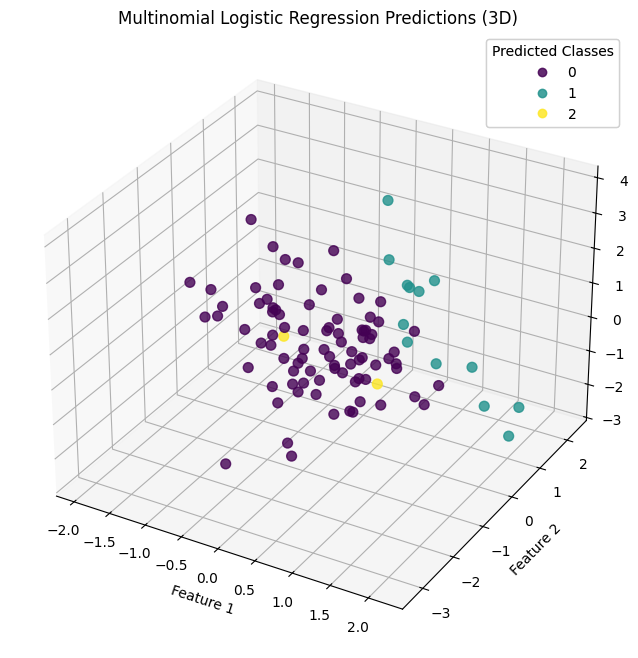

In [36]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=predictions, cmap='viridis', s=50, alpha=0.8)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Multinomial Logistic Regression Predictions (3D)')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Classes")
ax.add_artist(legend1)

plt.show()
